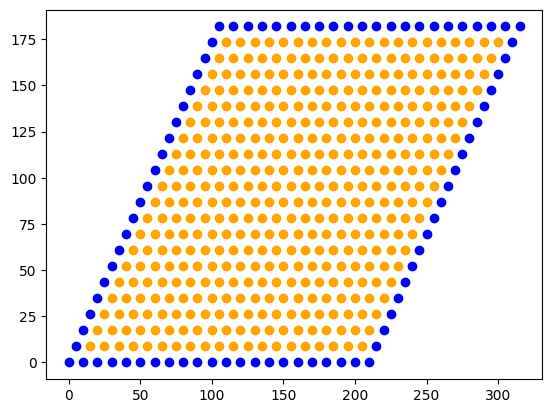

BURST ->  [(1, 5), (1, 18), (1, 19), (2, 7), (2, 8), (2, 12), (3, 14), (4, 4), (4, 9), (5, 8), (5, 13), (5, 17), (6, 3), (6, 4), (6, 14), (6, 15), (7, 9), (7, 20), (9, 2), (9, 3), (9, 5), (9, 18), (9, 19), (10, 3), (10, 14), (10, 15), (11, 5), (11, 6), (11, 7), (11, 9), (11, 11), (11, 13), (11, 16), (12, 1), (12, 4), (12, 6), (12, 11), (12, 16), (12, 17), (12, 19), (13, 5), (13, 12), (13, 13), (13, 14), (13, 18), (14, 2), (14, 3), (15, 3), (15, 10), (16, 8), (16, 12), (16, 16), (17, 5), (17, 16), (17, 20), (18, 1), (18, 4), (18, 8), (18, 14), (19, 1), (19, 6), (19, 10), (19, 15), (20, 12), (20, 20)]
Initial affected bubbles


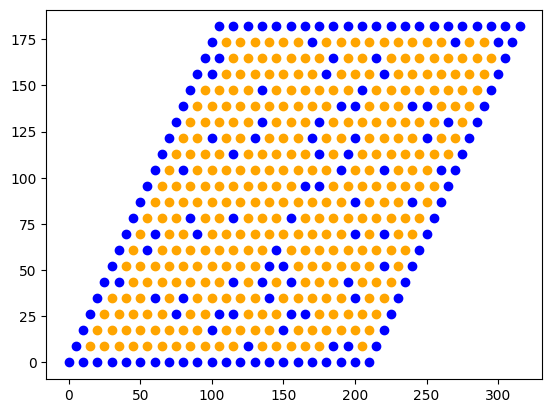

BURST ->  [(1, 8), (1, 20), (2, 9), (3, 6), (3, 12), (3, 16), (4, 12), (5, 3), (5, 14), (6, 2), (6, 12), (6, 17), (7, 5), (7, 11), (7, 15), (7, 18), (8, 4), (8, 12), (8, 14), (8, 20), (9, 10), (10, 4), (10, 6), (10, 13), (10, 16), (11, 1), (11, 2), (11, 10), (11, 20), (12, 9), (12, 13), (12, 14), (12, 18), (13, 9), (13, 10), (14, 6), (14, 13), (15, 17), (15, 18), (16, 9), (16, 15), (16, 17), (17, 7), (17, 11), (17, 15), (17, 18), (19, 2), (19, 9), (19, 17), (19, 19), (20, 4), (20, 16)]
Initial affected bubbles


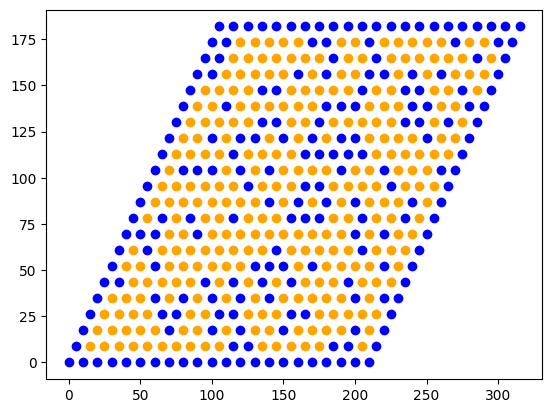

BURST ->  [(1, 12), (2, 5), (2, 6), (2, 10), (2, 14), (2, 16), (3, 1), (3, 9), (4, 18), (4, 19), (5, 4), (5, 11), (5, 18), (6, 7), (8, 2), (8, 3), (8, 6), (8, 7), (8, 10), (8, 13), (8, 17), (9, 11), (9, 16), (9, 17), (10, 1), (10, 5), (10, 19), (11, 15), (11, 19), (12, 5), (12, 12), (13, 3), (13, 6), (13, 16), (13, 17), (14, 5), (14, 7), (14, 14), (14, 20), (15, 1), (15, 2), (15, 13), (15, 20), (16, 1), (16, 4), (16, 7), (16, 11), (16, 19), (17, 3), (18, 10), (18, 13), (18, 16), (18, 17), (19, 20), (20, 8)]
Initial affected bubbles


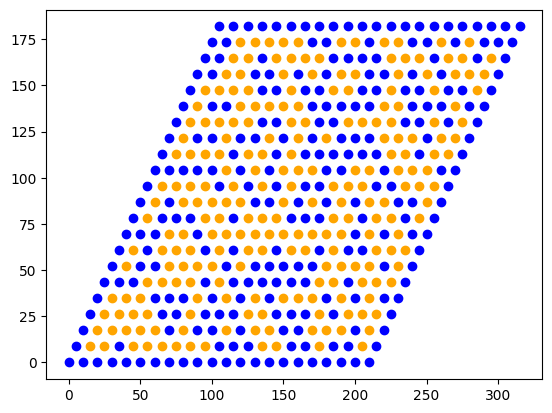

BURST ->  [(1, 10), (2, 1), (3, 11), (3, 18), (3, 20), (4, 8), (4, 20), (5, 5), (5, 6), (5, 16), (7, 7), (7, 10), (8, 16), (9, 4), (9, 7), (10, 2), (10, 20), (11, 14), (12, 2), (13, 4), (14, 16), (15, 4), (15, 11), (15, 12), (16, 5), (16, 6), (16, 18), (16, 20), (17, 1), (17, 4), (17, 8), (17, 14), (18, 7), (19, 13)]
Initial affected bubbles


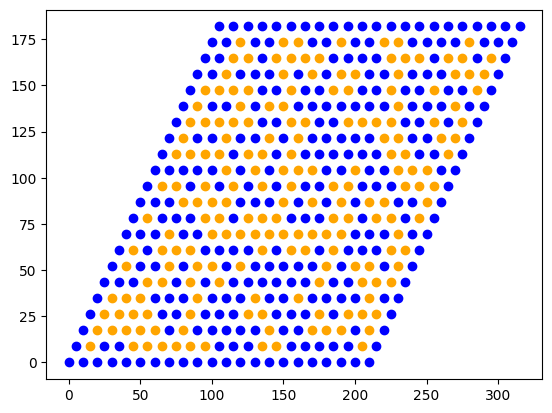

0.01


In [23]:
import numpy as np
import matplotlib.pyplot as plt

#constants
c1 = 6
c2 = 5
n = 1

def genLattice(m,p,s=10):
    a = s*np.array([1,0,0,0])
    b = s*np.array([1/2,np.sqrt(3)/2,0,0])
    m = m+2
    t = np.zeros((m*m,4))
    for i in range(m):
        for j in range(m):
            t[m*i+j] = a*i + b*j
            if i == 0:
                t[m*i+j,3] = 1
            elif i == m-1:
                t[m*i+j,3] = 1
            elif j == 0:
                t[m*i+j,3] = 1
            elif j == m-1:
                t[m*i+j,3] = 1
    for i in range(len(t)):
        t[i,2] = p
    return t

def render(t):
    for i in t:
        if i[3] == 1:
            plt.scatter(i[0], i[1], color='blue')
        else:
            plt.scatter(i[0],i[1],color='orange')
    plt.show()

#Calculated constants
beta = c2/n
pInit = 1/(c1*n)
m = 20

t = genLattice(m,pInit)
render(t)

m = m+2
mn = m -2
# Main while loop
c = 0
taff = []
tburst = []
while True:
    lastaff = list(taff)
    taff = []
    s = 0
    for i in t:
        s+= i[3]
    if s - (4*mn + 4) >= (mn*mn)/2:
        break

    burst = []
    for i in range(m):
        for j in range(m):
            o = m*i+j
            br = np.random.choice((1,0),p=[t[o,2],1-t[o,2]])
            if t[o,3] == 1:
                continue
            elif t[o,3] == 0 and br==1:
                t[o,3] = br
                burst.append((i,j))
    # Random bursting over
    aff = []
    print('BURST -> ',burst)
    for i in burst:
        x = i[0]
        y = i[1]
        aff.append((x-1,y+1))
        aff.append((x-1,y))
        aff.append((x,y-1))
        aff.append((x+1,y-1))
        aff.append((x+1,y))
        aff.append((x,y+1))

    print('Initial affected bubbles')
    #for i in aff:
     #   x = i[0]
      #  y = i[1]
        #plt.scatter(t[m*x+y,0],t[m*x+y,1],color='red')
    #plt.show()

    while True:
        if len(burst) == 0:
            break
        else:
            burst = []
            for o in aff:
                x, y = o
                l = m*x+y
                newP = t[l,2] + (beta/6)
                if newP > 1 and t[l,3] == 0:
                    t[l,3] = 1
                    print('Affected Bursting')
                    burst.append((x,y))
                elif newP < 1 and t[l,3] == 0:
                    t[l,2] = newP
                    taff.append((x,y))
            aff = []
            for i in burst:
                x = i[0]
                y = i[1]
                aff.append((x-1,y+1))
                aff.append((x-1,y))
                aff.append((x,y-1))
                aff.append((x+1,y-1))
                aff.append((x+1,y))
                aff.append((x,y+1))
    render(t)
        
    taff = list(set(taff))
    for i in lastaff:
        if i not in taff:
            x = i[0]
            y = i[1]
            o = m*x+y
            t[o,2] == pInit
            print('Relaxed -> ', (x,y))
    c+=1
print(c/(mn*mn))

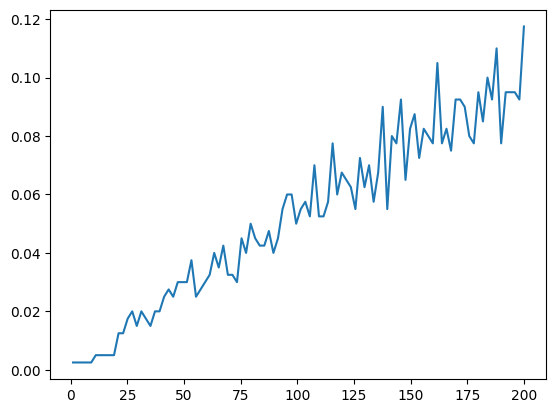

In [42]:
import numpy as np
import matplotlib.pyplot as plt
q = []
w = []
ns = np.linspace(1,200,100)
for k in ns:
    #constants
    c1 = 6
    c2 = 60
    n = k
    q.append(k)
    
    def genLattice(m,p,s=10):
        a = s*np.array([1,0,0,0])
        b = s*np.array([1/2,np.sqrt(3)/2,0,0])
        m = m+2
        t = np.zeros((m*m,4))
        for i in range(m):
            for j in range(m):
                t[m*i+j] = a*i + b*j
                if i == 0:
                    t[m*i+j,3] = 1
                elif i == m-1:
                    t[m*i+j,3] = 1
                elif j == 0:
                    t[m*i+j,3] = 1
                elif j == m-1:
                    t[m*i+j,3] = 1
        for i in range(len(t)):
            t[i,2] = p
        return t
    
    def render(t):
        for i in t:
            if i[3] == 1:
                plt.scatter(i[0], i[1], color='blue')
            else:
                plt.scatter(i[0],i[1],color='orange')
        plt.show()
    
    #Calculated constants
    beta = c2/n
    pInit = 1/(c1*n)
    m = 20
    
    t = genLattice(m,pInit)
    #render(t)
    
    m = m+2
    mn = m -2
    # Main while loop
    c = 0
    taff = []
    tburst = []
    while True:
        lastaff = list(taff)
        taff = []
        s = 0
        for i in t:
            s+= i[3]
        if s - (4*mn + 4) >= (mn*mn)/2:
            break
    
        burst = []
        for i in range(m):
            for j in range(m):
                o = m*i+j
                br = np.random.choice((1,0),p=[t[o,2],1-t[o,2]])
                if t[o,3] == 1:
                    continue
                elif t[o,3] == 0 and br==1:
                    t[o,3] = br
                    burst.append((i,j))
        # Random bursting over
        aff = []
        #print('BURST -> ',burst)
        for i in burst:
            x = i[0]
            y = i[1]
            aff.append((x-1,y+1))
            aff.append((x-1,y))
            aff.append((x,y-1))
            aff.append((x+1,y-1))
            aff.append((x+1,y))
            aff.append((x,y+1))
    
        #print('Initial affected bubbles')
        #for i in aff:
         #   x = i[0]
          #  y = i[1]
            #plt.scatter(t[m*x+y,0],t[m*x+y,1],color='red')
        #plt.show()
    
        while True:
            if len(burst) == 0:
                break
            else:
                burst = []
                for o in aff:
                    x, y = o
                    l = m*x+y
                    newP = t[l,2] + (beta/6)
                    if newP > 1 and t[l,3] == 0:
                        t[l,3] = 1
                        #print('Affected Bursting')
                        burst.append((x,y))
                    elif newP < 1 and t[l,3] == 0:
                        t[l,2] = newP
                        taff.append((x,y))
                aff = []
                for i in burst:
                    x = i[0]
                    y = i[1]
                    aff.append((x-1,y+1))
                    aff.append((x-1,y))
                    aff.append((x,y-1))
                    aff.append((x+1,y-1))
                    aff.append((x+1,y))
                    aff.append((x,y+1))
        #render(t)
            
        taff = list(set(taff))
        for i in lastaff:
            if i not in taff:
                x = i[0]
                y = i[1]
                o = m*x+y
                t[o,2] == pInit
                #print('Relaxed -> ', (x,y))
        c+=1
    #print(c/(mn*mn))
    w.append(c/(mn*mn))

plt.plot(q,w)
plt.show()